In [19]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score

#Import Data
dataset=pd.read_csv('train.csv',sep=',',header=0)

In [20]:
dataset['condition_numeric'] = dataset.condition.map({
   'Fair': 0,
   'Good': 1,
   'Like New': 2
})
dataset['area_number_numberic'] = dataset.area_name.map({
   'fff': 0,
   'aaa': 1,
   'ddd': 2,
   'jjj': 3,
   'hhh': 4,
   'bbb': 5,
   'ccc': 6,
   'ggg': 7,
   'kkk': 8,
   'eee': 9
})
dataset['day_number_numberic'] = dataset.day.map({
   'Sun': 0,
   'Mon': 1,
   'Tue': 2,
   'Wed': 3,
   'Thu': 4,
   'Fri': 5,
   'Sat': 6
})


In [21]:
dataset.describe()

,item_id,category_class,sold_price,price,size,hour,condition_numeric,area_number_numberic,day_number_numberic
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,5529.531429,1.498571,1092.124286,1118.312857,9.407143,11.471429,0.988571,4.562857,2.611429
std,2590.820764,1.359015,201.949030,298.301200,7.804199,6.852255,0.782415,2.850152,1.462115
min,1041.000000,0.000000,646.000000,645.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3309.250000,0.000000,948.750000,948.000000,4.000000,5.000000,0.000000,2.000000,2.000000
50%,5556.500000,1.000000,1059.000000,1058.000000,7.000000,12.000000,1.000000,5.000000,3.000000
75%,7617.500000,2.000000,1188.250000,1193.750000,12.000000,17.000000,2.000000,7.000000,4.000000
max,9990.000000,4.000000,1874.000000,3181.000000,59.000000,23.000000,2.000000,9.000000,6.000000


In [22]:
dataset.corr()

,item_id,category_class,sold_price,price,size,hour,condition_numeric,area_number_numberic,day_number_numberic
item_id,1.000000,0.007376,-0.001447,0.018117,-0.016210,0.076700,0.087427,0.004362,0.038368
category_class,0.007376,1.000000,0.003725,0.045501,0.156726,-0.025122,0.037657,0.018306,-0.076597
sold_price,-0.001447,0.003725,1.000000,0.776618,0.440042,-0.011060,0.171231,0.040337,0.048115
price,0.018117,0.045501,0.776618,1.000000,0.447971,-0.007915,0.162376,0.054239,0.049008
size,-0.016210,0.156726,0.440042,0.447971,1.000000,-0.018281,0.067771,0.024478,0.094752
hour,0.076700,-0.025122,-0.011060,-0.007915,-0.018281,1.000000,-0.102261,0.017087,-0.124340
condition_numeric,0.087427,0.037657,0.171231,0.162376,0.067771,-0.102261,1.000000,0.011229,0.047385
area_number_numberic,0.004362,0.018306,0.040337,0.054239,0.024478,0.017087,0.011229,1.000000,-0.026057
day_number_numberic,0.038368,-0.076597,0.048115,0.049008,0.094752,-0.124340,0.047385,-0.026057,1.000000


In [23]:
#Finding Null values
total = dataset.isnull().sum().sort_values(ascending=False)
percent_1 = dataset.isnull().sum()/dataset.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
day_number_numberic,0,0.0
area_number_numberic,0,0.0
condition_numeric,0,0.0
day,0,0.0
item_tag_hash,0,0.0


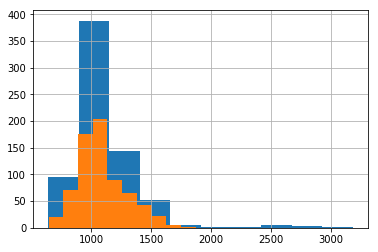

In [24]:
# plot a histogram  
dataset['price'].hist(bins=10)
dataset['sold_price'].hist(bins=10)

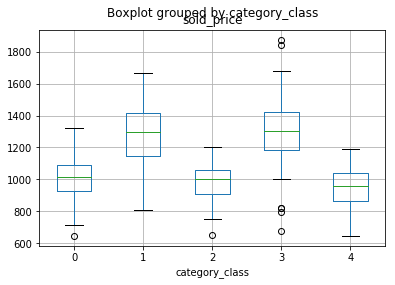

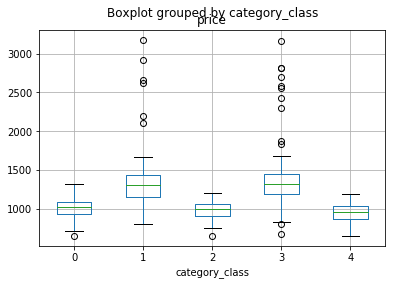

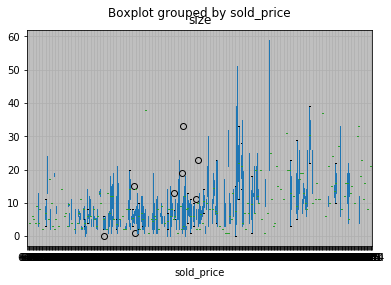

In [25]:
# shows presence of a lot of outliers/extreme values 
dataset.boxplot(column='sold_price', by = 'category_class')
dataset.boxplot(column='price',by = 'category_class')
dataset.boxplot(column='size',by = 'sold_price')

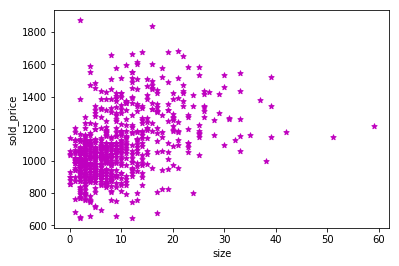

In [26]:
# plotting points as a scatter plot 
x = dataset["size"] 
y = dataset["sold_price"] 
plt.scatter(x, y, label= "stars", color= "m",  
            marker= "*", s=30) 
# x-axis label 
plt.xlabel('size') 
# frequency label 
plt.ylabel('sold_price') 
# function to show the plot 
plt.show() 

In [27]:
X = dataset[[
   'item_id', 'sold_price', 'price', 'area_number_numberic',
   'condition_numeric', 'size' ,'day_number_numberic', 'hour'
]]
y = dataset.category_class
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=20)

In [28]:
linear_classifier=LogisticRegression()
linear_classifier.fit(X_train,y_train)
LC_Predicted_Results=linear_classifier.predict(X_test)
print(metrics.accuracy_score(LC_Predicted_Results, y_test))
print ('F1 score:', f1_score(y_test, predicted_results,
                            average='weighted'))

0.5285714285714286
F1 score: 0.5690625918439031


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
random_classifier = RandomForestClassifier()
random_classifier.fit(X_train, y_train)
predicted_results = random_classifier.predict(X_test)
print(metrics.accuracy_score(predicted_results, y_test))
print( 'F1 score:', f1_score(y_test, predicted_results,
                            average='weighted'))

0.5428571428571428
F1 score: 0.5406997676030759


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [13]:
 rf = RandomForestClassifier()
 rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
 rf_random.fit(X_train,y_train)
 print("tuned hpyerparameters :(best parameters) ",rf_random.best_params_)
 print("accuracy :",rf_random.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.6min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


tuned hpyerparameters :(best parameters)  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}
accuracy : 0.5785714285714286


In [18]:
random_classifier = RandomForestClassifier(n_estimators = 400, min_samples_split = 10, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 90, bootstrap= True)
random_classifier.fit(X_train, y_train)
predicted_results = random_classifier.predict(X_test)
print(metrics.accuracy_score(predicted_results, y_test))
print ('F1 score:', f1_score(y_test, predicted_results,
                            average='weighted'))

0.5857142857142857
F1 score: 0.5690625918439031


In [17]:
#Import Data
testset=pd.read_csv('test.csv',sep=',',header=0)

In [24]:
testset['condition_numeric'] = testset.condition.map({
   'Fair': 0,
   'Good': 1,
   'Like New': 2
})
testset['area_number_numberic'] = testset.area_name.map({
   'fff': 0,
   'aaa': 1,
   'ddd': 2,
   'jjj': 3,
   'hhh': 4,
   'bbb': 5,
   'ccc': 6,
   'ggg': 7,
   'kkk': 8,
   'eee': 9
})
testset['day_number_numberic'] = testset.day.map({
   'Sun': 0,
   'Mon': 1,
   'Tue': 2,
   'Wed': 3,
   'Thu': 4,
   'Fri': 5,
   'Sat': 6
})

In [25]:
X1 = testset[[
   'item_id', 'sold_price', 'price', 'area_number_numberic',
   'condition_numeric', 'size', 'day_number_numberic', 'hour'
]]

In [26]:
output = random_classifier.predict(X1)

In [27]:
print(output)

[2 0 1 1 2 0 0 0 0 1 2 0 0 3 0 2 3 1 0 2 2 0 2 0 1 0 4 2 2 0 0 1 2 0 1 0 2
 1 0 0 0 4 0 2 1 1 1 0 1 0 2 1 1 3 2 0 0 1 0 0 2 2 0 1 1 0 1 0 0 0 2 0 3 1
 0 0 1 2 2 0 0 4 1 0 0 4 2 1 1 1 3 2 1 2 3 2 0 0 0 0 3 0 3 2 0 2 4 1 3 1 0
 0 1 2 2 0 1 0 0 2 0 0 2 0 0 0 0 2 0 0 0 4 0 3 4 2 0 3 0 0 2 0 3 0 0 2 3 1
 0 0 0 0 0 3 2 3 3 1 0 0 0 3 2 4 0 2 2 1 2 4 0 0 0 2 1 1 2 0 1 1 2 0 3 2 1
 0 1 0 2 0 3 1 1 0 1 2 0 2 4 2 2 2 0 0 2 0 0 3 2 2 0 0 0 2 0 1 2 2 4 0 1 3
 2 0 0 2 1 0 2 1 0 0 1 0 1 4 1 1 2 0 4 0 0 0 2 1 3 0 2 3 1 0 0 1 1 2 4 0 3
 0 3 1 0 2 0 0 2 0 3 1 0 2 0 0 2 0 1 0 0 1 2 1 1 2 0 2 0 0 0 3 0 0 3 0 1 0
 3 1 2 1]
